In [1]:
import adddeps
from pltconf import *
from utils.utils import standartize
import numpy as np
from scipy.stats import norm,normaltest, probplot

import pandas as pd
import sys, os

In [39]:
import pickle
# with open("QQ-data-4.1.pkl", "rb") as f:
with open("../beta_omega/QQ-data-4.1-(v2).pkl", "rb") as f:
    plot_data = pickle.load(f)

In [40]:
plot_data

([array([-1.02576093, -0.1048926 , -0.21165737, ..., -1.26021333,
          0.99138435,  0.39838632]),
  array([ 0.02843243,  0.74999386,  1.3066876 , ..., -1.18898417,
         -0.15461397,  0.35733826]),
  array([ 1.2792402 ,  0.50615992,  0.91536924, ..., -0.92099521,
          0.67614021,  2.97151324]),
  array([ 1.16526836, -0.46696261,  0.34528872, ...,  0.1670801 ,
         -0.34167065, -0.76071565])],
 ['$v_x$', '$r_x$', 'residue${}_x$', '$v_z$'])

/data/biophys/ashmat/tmp/ipykernel_18593/2011329808.py:22: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  ax = plt.subplot(gs[i_], sharex=plt.subplot(gs[0]), sharey=plt.subplot(gs[0]));i_+=1
/data/biophys/ashmat/tmp/ipykernel_18593/2011329808.py:43: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  ax = plt.subplot(gs[cols + j_], sharex=plt.subplot(gs[cols]), sharey=plt.subplot(gs[cols]));j_+=1


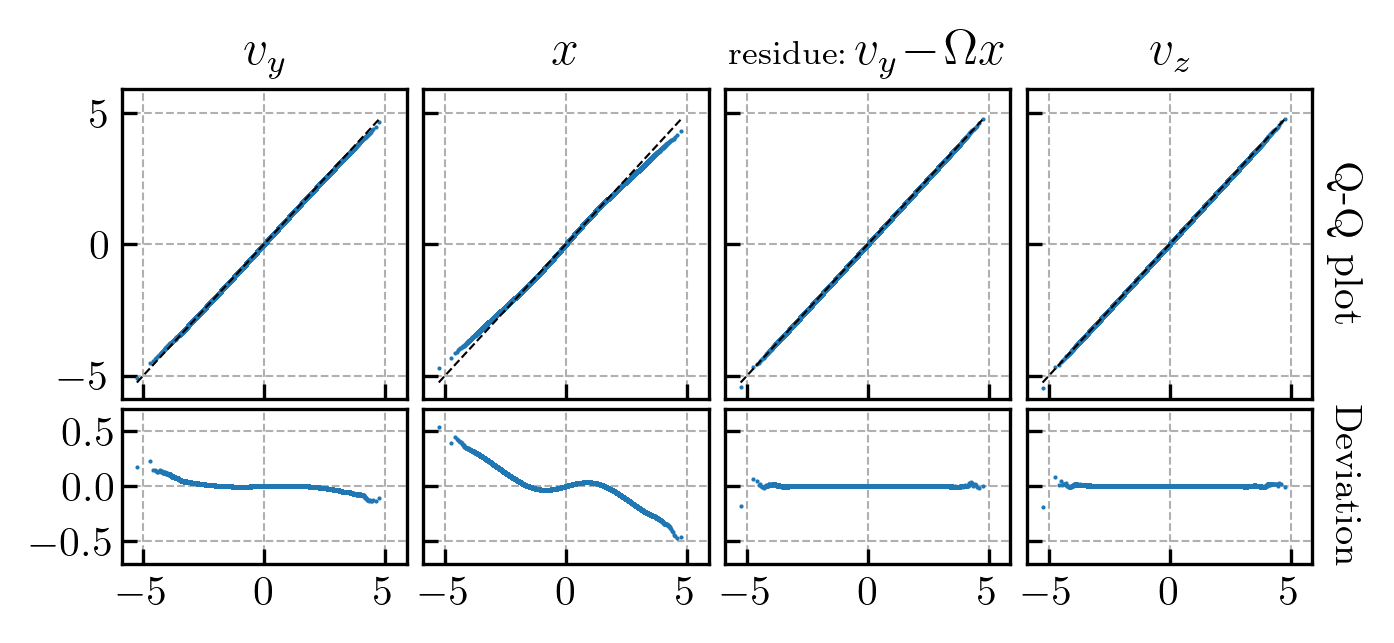

In [43]:
from matplotlib import gridspec

sp=100000
sp = 10

i_ = 0
j_ = 0
rasterized = True

W = 5.9

# gs = gridspec.GridSpec(2, 3)
my_titles = ['$v_y$', '$x$', r'{\footnotesize residue:}$\,{v}_y\!-\!\Omega x$', "$v_z$"]
cols = len(my_titles)
gs = gridspec.GridSpec(2, cols, width_ratios=[1]*cols, height_ratios=[2,1]) 
plt.figure(figsize=(14/3,2))
for title, points, _  in zip(my_titles, *plot_data): 
    ms = 1

    ((osm, osr), (slope, intercept, _r)) = probplot(points, dist="norm",)
    
    ax = plt.subplot(gs[i_], sharex=plt.subplot(gs[0]), sharey=plt.subplot(gs[0]));i_+=1
    ax.set_xlim(-W,W)
    ax.set_ylim(-W,W)
    plt.scatter(osm[::sp], osr[::sp], s=ms, rasterized=rasterized, lw=0)
    plt.plot(osm[::sp], osm[::sp] * slope + intercept, ls="--", c="k", lw=0.51)
    plt.title(title)
#     ax.axis('equal')
    
    ax.set_axisbelow(True)
    plt.grid(ls='--', lw=0.5)   
    
    ax.tick_params(axis="x", which="both", direction="in",pad=3)
    ax.tick_params(axis="y", which="both", direction="in",pad=2.5)
    if i_ > 1:
        plt.setp(ax.get_yticklabels(), visible=False)

    if i_==cols:
        ax.set_ylabel("Q-Q plot", labelpad=-72, rotation=-90)

    ax.xaxis.set_ticklabels([])
        
    ax = plt.subplot(gs[cols + j_], sharex=plt.subplot(gs[cols]), sharey=plt.subplot(gs[cols]));j_+=1
#     plt.title("diff w.r.t. slope")
    plt.scatter(osm[::sp], osr[::sp]-(osm[::sp] * slope + intercept), s=ms, lw=0,rasterized=rasterized)
    ax.set_xlim(-W,W)
    ax.set_ylim(-0.7,0.7)

    ax.set_axisbelow(True)
    plt.grid(ls='--', lw=0.5)    
    
    ax.tick_params(axis="x", which="both", direction="in",pad=3)
    ax.tick_params(axis="y", which="both", direction="in",pad=1.5)
    if j_ > 1:
        plt.setp(ax.get_yticklabels(), visible=False)

    if j_==cols:
        ax.set_ylabel("Deviation", labelpad=-72, rotation=-90, fontsize=9)

plt.tight_layout(pad=0.2)
# plt.subplots_adjust(bottom=0, right=0, top=1)
plt.savefig(f"QQ-plots.pdf", bbox_inches='tight')

In [35]:
gs[0]

GridSpec(2, 3, height_ratios=[2, 1])[0:1, 0:1]